###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Statistical Learning I
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

## Laboratorio 1

#### Importar libreriras

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargar archivo

In [14]:
dataset=pd.read_csv("train_HP.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Explorar archivo

In [15]:
## Columnas del dataset
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
## Tipo de datos
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [17]:
##Cantidad de registros y forma
dataset.shape

(1460, 81)

#### Buscar columnas con valores Nulos

In [18]:
col_null=[] ##Se crea una lista vacia que se llenará con las columnas con nulos

for col in dataset.columns:
    if dataset[col].isnull().any()==1:
       col_null.append(col) 
print(col_null)
print(f"El dataset tiene: {len(col_null)} columnas con Null")

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
El dataset tiene: 19 columnas con Null


In [19]:
##El tipo de dato de las 19 columnas con Null
dataset[col_null].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [20]:
##Media de la cantidad de registros con Null de las 19 columnas
dataset[col_null].isnull().mean()


LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [21]:
## Eiminar aquellas columnas que no agregan valor al dataset, es decir mayor a 0.05 de media de nulos
col_rescatables=[]

for col in dataset.columns:
    if dataset[col].isnull().mean()<=0.05:
        col_rescatables.append(col)

col_rescatables


['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [22]:
### Interseccion de todas las columnas rescatables con las columnas con nulo, para obtener las que se deben imputar para completar el Nulo
col_null_rescatables=list(set(col_rescatables).intersection(set(col_null))) 

## De las 19 columnas que tenian nulos se eliminaron 11 que no eran rescatables y se dejaron 8 rescatables a imputar
col_null_rescatables

['BsmtFinType2',
 'Electrical',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'MasVnrArea',
 'BsmtFinType1']

In [23]:
##Tipo de dato de las 8 columnas que hay que imputar
dataset[col_null_rescatables].dtypes

BsmtFinType2     object
Electrical       object
MasVnrType       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
MasVnrArea      float64
BsmtFinType1     object
dtype: object

#### Imputación

##### Imputación Media y Mediana

In [24]:
## La unica variable para imputación con dato numerico es MasVnrArea

## Validar si se imputa con la Media o Mediana los Nulos

media=dataset['MasVnrArea'].mean()
mediana=dataset['MasVnrArea'].median()

print(f"Media:{media}")
print(f"Mediana:{mediana}")

Media:103.68526170798899
Mediana:0.0


In [25]:
## Se agregan dos culumnas nuevas con la imputación de valores nulos, una con la media y otra con la mediana
dataset['MasVnrArea_Mean']=np.round(dataset['MasVnrArea'].fillna(media),0)
dataset['MasVnrArea_Median']=np.round(dataset['MasVnrArea'].fillna(mediana),0)
dataset[['MasVnrArea','SalePrice','MasVnrArea_Mean','MasVnrArea_Median']]


,MasVnrArea,SalePrice,MasVnrArea_Mean,MasVnrArea_Median
0,196.0,208500,196.0,196.0
1,0.0,181500,0.0,0.0
2,162.0,223500,162.0,162.0
3,0.0,140000,0.0,0.0
4,350.0,250000,350.0,350.0
...,...,...,...,...
1455,0.0,175000,0.0,0.0
1456,119.0,210000,119.0,119.0
1457,0.0,266500,0.0,0.0
1458,0.0,142125,0.0,0.0


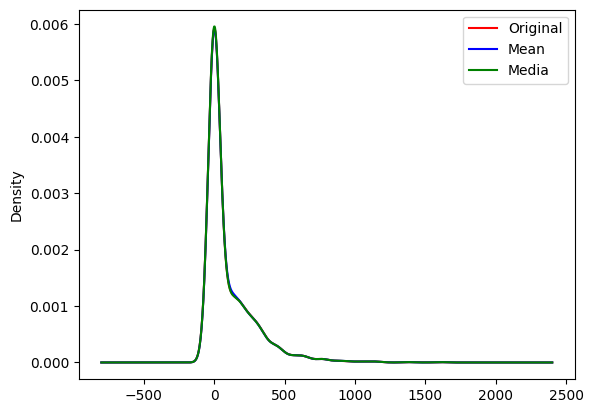

In [26]:
##Grafica para observar la distorcion entre la variable original, la imputación de media y la imputación de mediana
fig=plt.figure()
ax=fig.add_subplot(111)

dataset['MasVnrArea'].plot.density(color='red',label='Original')
dataset['MasVnrArea_Mean'].plot.density(color='blue',label='Mean')
dataset['MasVnrArea_Median'].plot.density(color='green',label='Media')
ax.legend()
plt.show()

<Axes: >

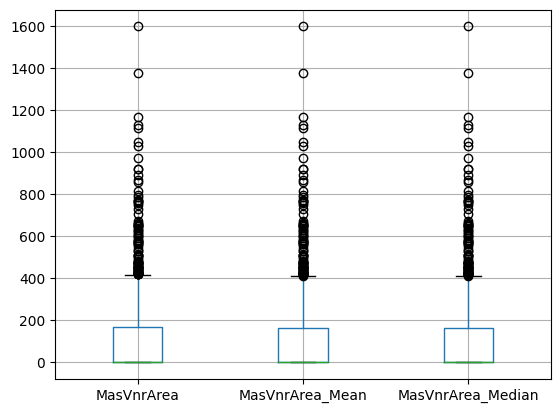

In [27]:
dataset[['MasVnrArea','MasVnrArea_Mean','MasVnrArea_Median']].boxplot()

In [28]:
## No hay diferencia o distorcion entre imputar con la media o la mediana

##Se elige la media para imputar lo nulos y se convierte la columna original en la columna nueva sin nulos

dataset['MasVnrArea']=dataset['MasVnrArea_Mean']

##Eliminar las columnas creadas para volver al dataset original pero con la columna imputada

dataset.drop(['MasVnrArea_Mean','MasVnrArea_Median'],axis=1,inplace=True)



##### Imputación Categorica

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


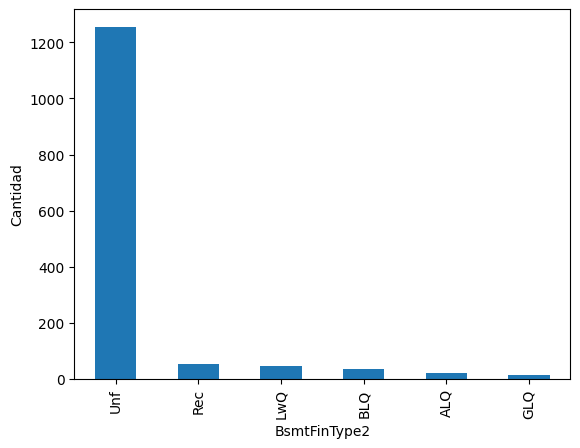

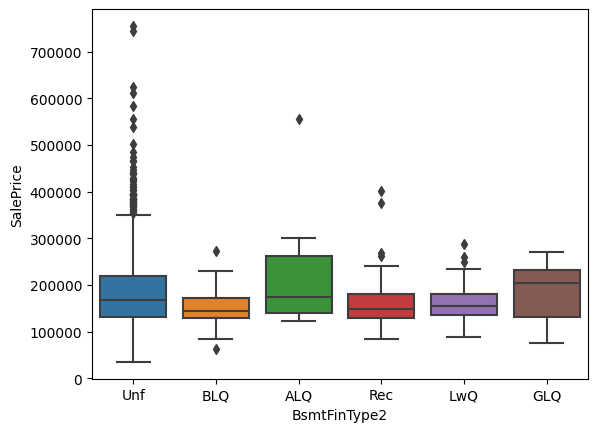

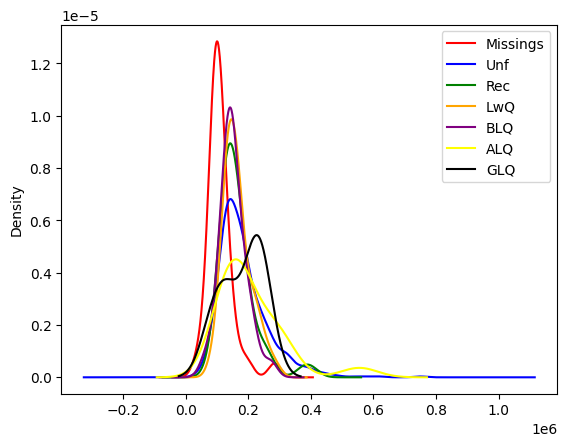

In [49]:
## De las 8 columnas que hay que imputar la primera categorica es: BsmtFinType2

print(dataset['BsmtFinType2'].value_counts())

dataset['BsmtFinType2'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel('BsmtFinType2')
plt.show()

sns.boxplot(x=dataset['BsmtFinType2'],y=dataset['SalePrice'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

dataset[dataset['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataset[dataset['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="green", label="Rec")
dataset[dataset['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="orange", label="LwQ")
dataset[dataset['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataset[dataset['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="yellow", label="ALQ")
dataset[dataset['BsmtFinType2'] == 'GLQ']['SalePrice'].plot(kind="kde", color="black", label="GLQ")
ax.legend()
plt.show()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


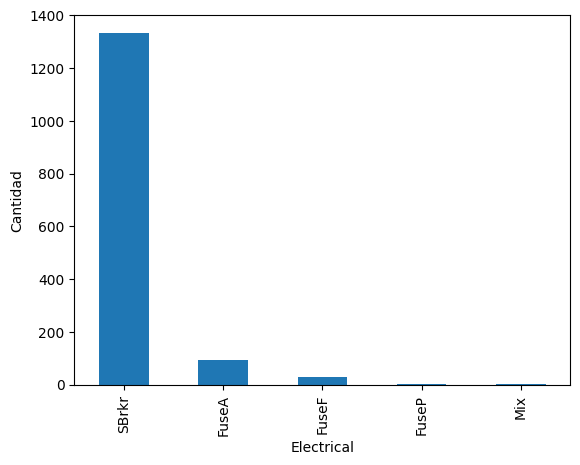

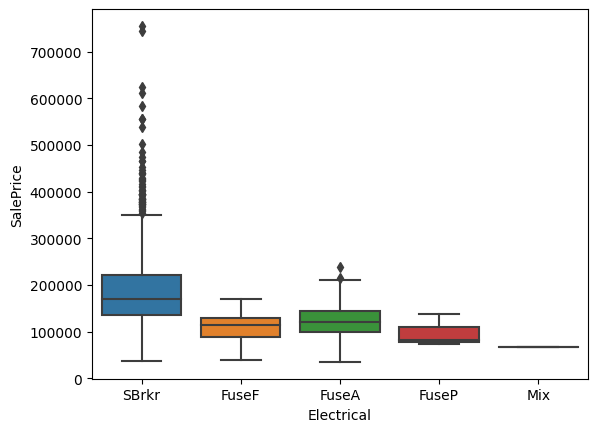

In [50]:
## De las 8 columnas que hay que imputar la segunda categorica que es: Electrical

print(dataset['Electrical'].value_counts())

dataset['Electrical'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel('Electrical')
plt.show()

sns.boxplot(x=dataset['Electrical'],y=dataset['SalePrice'])
plt.show()


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


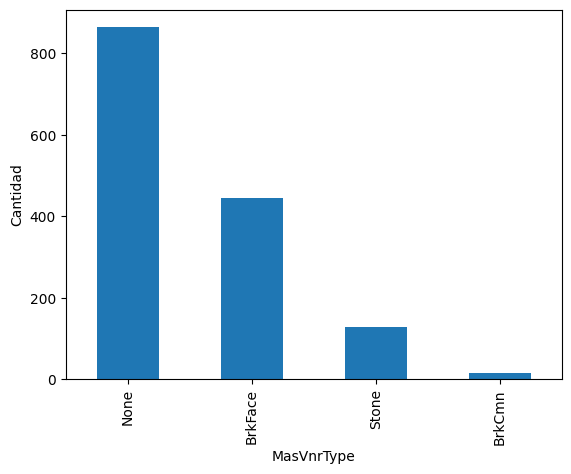

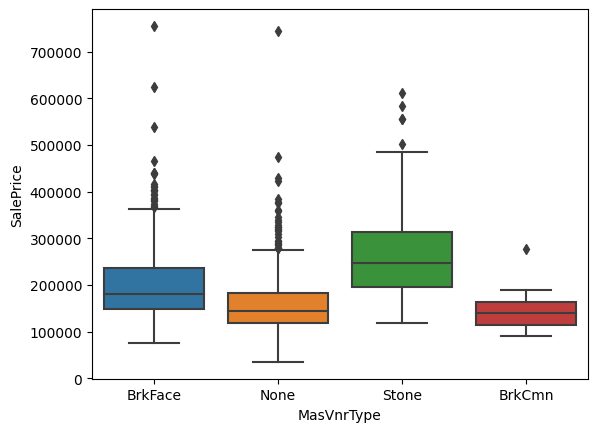

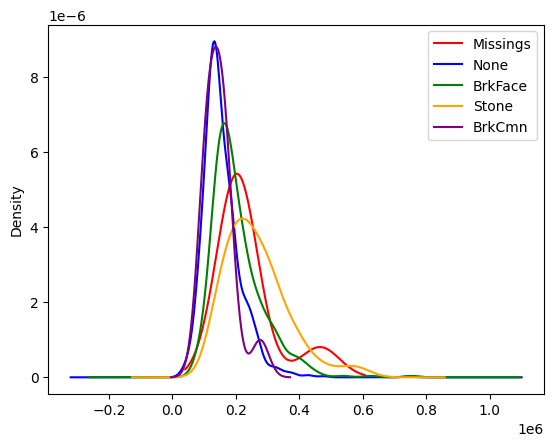

In [57]:
## De las 8 columnas que hay que imputar la tercera categorica que es: MasVnrType

print(dataset['MasVnrType'].value_counts())

dataset['MasVnrType'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel('MasVnrType')
plt.show()

sns.boxplot(x=dataset['MasVnrType'],y=dataset['SalePrice'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

dataset[dataset['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="blue", label="None")
dataset[dataset['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="green", label="BrkFace")
dataset[dataset['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="orange", label="Stone")
dataset[dataset['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="purple", label="BrkCmn")

ax.legend()
plt.show()


In [ ]:
##Se imputan las variables categoricas
dataset['BsmtFinType2'].fillna('BLQ',inplace=True) 
dataset['Electrical'].fillna('SBrkr',inplace=True) 
dataset['MasVnrType'].fillna('Stone',inplace=True) 